In [1]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import nedborradar
import skimage

In [4]:
x = nedborradar.RadarImage('Eastern Norway')
#Forbedring: Røde flekker for høy nedbørintensitet fanges ikkje opp. !

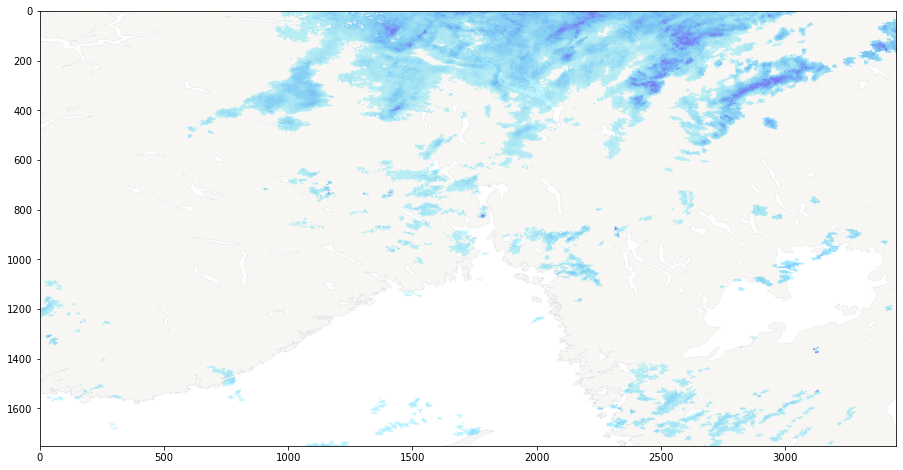

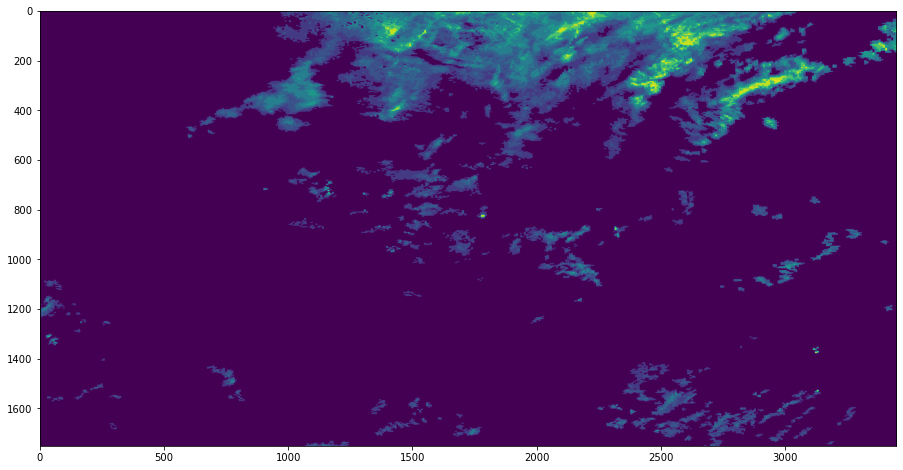

In [5]:
norge_radar = x.get_map()
radar = x.get_grayscale()

fig, ax = plt.subplots(figsize=(20,8))
ax.imshow(norge_radar)
plt.plot()

fig, ax = plt.subplots(figsize=(20,8))
ax.imshow(radar)
plt.show()

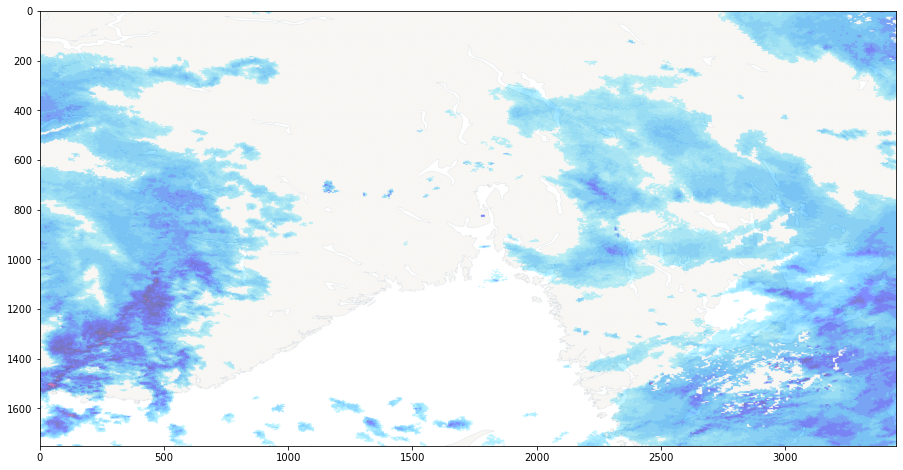

In [9]:
fig, ax = plt.subplots(figsize=(20,8))
ax.imshow(norge_radar)
plt.savefig('nedbor_og_norge')

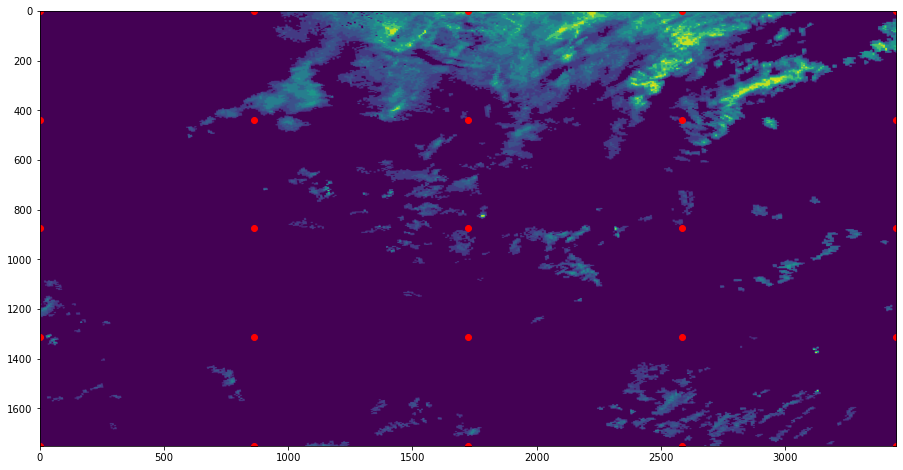

In [6]:
n_stations = 5
x_grid = np.linspace(0, radar.shape[1], n_stations)
y_grid = np.linspace(0, radar.shape[0], n_stations)

x_grid[-1] = x_grid[-1] - 1 #modify last coordinate to be within radar
y_grid[-1] = y_grid[-1] - 1

x_gridv, y_gridv = np.meshgrid(x_grid, y_grid) 
p_gridv = np.zeros(x_gridv.shape)

x_data = x_gridv.ravel()
y_data = y_gridv.ravel()
p_data = p_gridv.ravel()

for i in range(len(x_data) -2):
    p_data[i] = radar[int(y_data[i]), int(x_data[i])]

fig, ax = plt.subplots(figsize=(20,8))
ax.imshow(radar)
ax.scatter(x_data, y_data, c='red', marker='o')
plt.show()

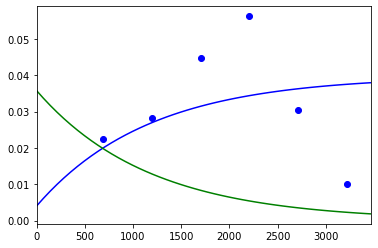

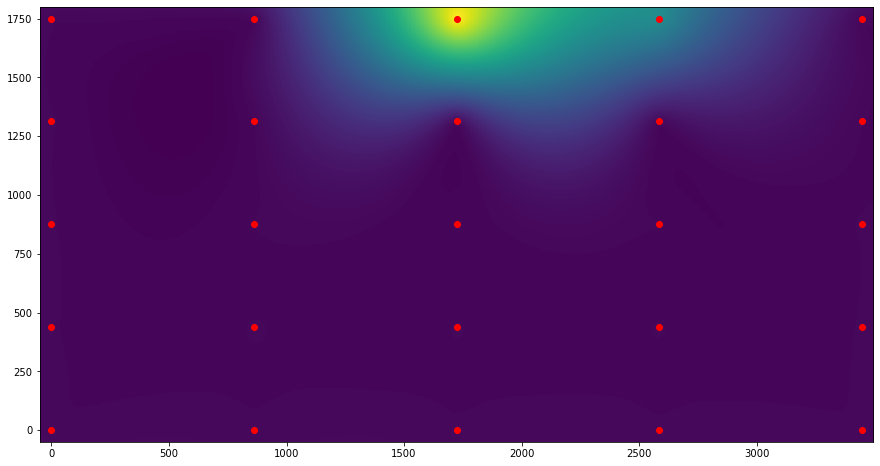

In [7]:
from geostat import OrdinaryKriging

resolution = 200
frame = 50
x_grid = np.linspace(x_data.min() - frame, x_data.max() + frame, resolution)
y_grid = np.linspace(y_data.min() - frame, y_data.max() + frame, resolution)


OK = OrdinaryKriging(
    x_data, #xverdier
    y_data, #yverdier
    p_data, #korresponderende p-verdier
    variogram_parameters = [-3, 1, 3500, 0.004],
    enable_plotting=True, 
    n_bins = 7, #number of averaging bins
)

z_grid_intp = OK.predict(x_grid, y_grid)


fig, ax = plt.subplots(figsize=(20,8))
ax.imshow(z_grid_intp, extent=[x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()],
           vmin=z_grid_intp.min(), vmax=z_grid_intp.max())
ax.scatter(x_data, y_data, c='red', marker='o')
plt.show()

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'exponential' Variogram Model
Partial Sill: 0.0025000000000000005
Full Sill: 0.007
Range: 2000
Nugget: 0.0045 



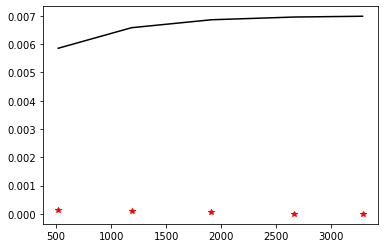

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



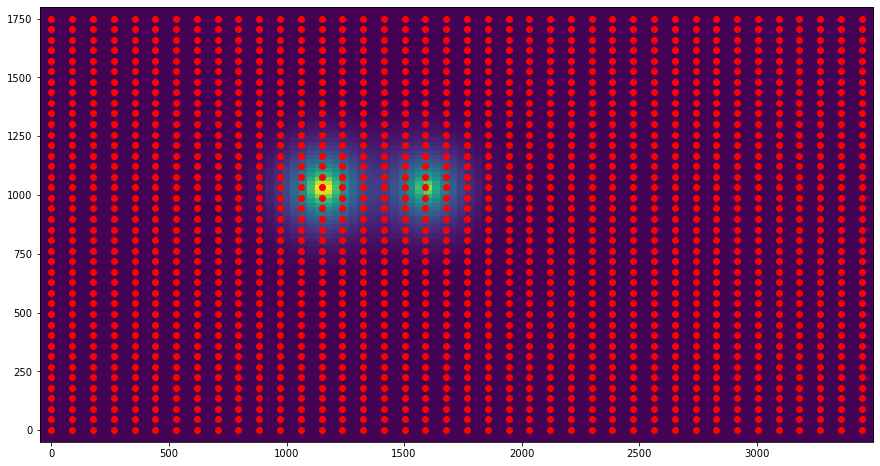

In [16]:
import numpy as np
from pykrige.ok import OrdinaryKriging
import matplotlib.pyplot as plt


resolution = 100
frame = 50
#data = np.hstack([x_data, y_data, p_data])
x_grid = np.linspace(x_data.min() - frame, x_data.max() + frame, resolution)
y_grid = np.linspace(y_data.min() - frame, y_data.max() + frame, resolution)



OK = OrdinaryKriging(
    x_data, #xverdier
    y_data, #yverdier
    p_data, #korresponderende p-verdier
    variogram_model="exponential",
    variogram_parameters = {'sill':0.007, 'range':2000, 'nugget':0.0045}, #sill: C0 + C1, nugget: C0 psill: sill - nugget
    verbose=True,
    enable_plotting=True, 
    nlags = 5, #number of averaging bins
    pseudo_inv = True
)

z_grid_intp_pykrieg, ss = OK.execute("grid", x_grid, y_grid)


fig, ax = plt.subplots(figsize=(20,8))
ax.imshow(z_grid_intp_pykrieg, extent=[x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()],
           vmin=z_grid_intp_pykrieg.min(), vmax=z_grid_intp_pykrieg.max())
ax.scatter(x_data, y_data, c='red', marker='o')
plt.show()
